In [1]:
!pip install face_recognition==1.3.0
!pip install opencv-python==4.4.0.46
!pip install networkx

     |████████████████████████████████| 82 kB 2.4 MB/s 
     |████████████████████████████████| 3.2 MB 37.8 MB/s 
     |████████████████████████████████| 100.1 MB 73.2 MB/s 
  Created wheel for dlib: filename=dlib-19.21.0-cp37-cp37m-linux_x86_64.whl size=4075204 sha256=a45bbaac520787a5882d68848d2512911d939e8cbc6beff52211b38b98e53c95
  Stored in directory: /home/jovyan/.cache/pip/wheels/d8/8f/ac/70af71fd636fb03b238ca3f183e64f5dfdb5e4ffffeff89ce6
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=f18147769ce36b2f01438338306f2967368de7fe2807796489f66f7690f32cd4
  Stored in directory: /home/jovyan/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built dlib face-recognition-models
     |████████████████████████████████| 49.5 MB 20.3 MB/s 
     |████████████████████████████████| 1.6 MB 18.7 MB/s 


In [ ]:
del Tree

NameError: name 'Tree' is not defined

In [2]:
import face_recognition
import pandas as pd
import networkx as nx

import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

import cv2
%matplotlib inline

from recognition import Detector
from binary import TreeBuilder as Tree

In [ ]:
!wget --output-document=test.jpg https://image.shutterstock.com/image-photo/image-cute-young-loving-couple-260nw-1130187179.jpg

--2020-11-13 13:19:51--  https://image.shutterstock.com/image-photo/image-cute-young-loving-couple-260nw-1130187179.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 23.223.37.120
Connecting to image.shutterstock.com (image.shutterstock.com)|23.223.37.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25469 (25K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  24.87K  --.-KB/s    in 0.08s   

2020-11-13 13:19:51 (328 KB/s) - ‘test.jpg’ saved [25469/25469]



In [3]:
test = face_recognition.load_image_file("test.jpg")
face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

Ниже приведен пример с помощью детекции колиззии на изображении

База данных подключена
(36, 170, 79, 127)
(94, 304, 137, 261)


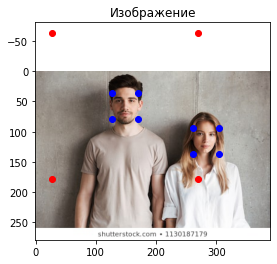

calcsquare - 1849, 43, 43
calcsquare - 1849, 43, 43
calcsquare - 59049, 243, 243
Saved encodings - []
face distances - []
Same key found - skipping
Check on [304, 94] with: 27, 179, 243, 243, 270, 422
False
Check on [304, 137] with: 27, 179, 243, 243, 270, 422
False
Check on [261, 137] with: 27, 179, 243, 243, 270, 422
True
found collision!
Saved encodings - [array([-0.14390448,  0.08405805,  0.0389417 , -0.01352661, -0.12342736,
        0.06478456, -0.11014025, -0.03452669,  0.19092363, -0.0820325 ,
        0.1232121 , -0.04585111, -0.15843275, -0.0733171 , -0.02593193,
        0.12207143, -0.14332815, -0.14223406, -0.03973599, -0.0902949 ,
        0.03772341,  0.03093182,  0.01327235,  0.10272617, -0.21242043,
       -0.4117395 , -0.08508258, -0.10026056, -0.02622255, -0.11400662,
       -0.05733325, -0.02340893, -0.19158305, -0.06662772, -0.00444277,
        0.11798186, -0.02107111, -0.09688486,  0.16833076,  0.02618199,
       -0.13266698,  0.03359555,  0.06359937,  0.28571945,  0.

In [4]:
from database import DataBase
db = DataBase("collisions.db")
det = Detector(db, False, True)
bias = 100

plt.title("Изображение")
plt.imshow(test)

face_locations = face_recognition.face_locations(test)
for face_location in face_locations:        
    print(face_location)
    plt.plot(face_location[1], face_location[0], 'bo')
    plt.plot(face_location[1], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[0], 'bo')

face_location = face_locations[0]   
plt.plot(face_location[1]+bias, face_location[0]-bias, 'ro')
plt.plot(face_location[1]+bias, face_location[2]+bias, 'ro')
plt.plot(face_location[3]-bias, face_location[2]+bias, 'ro')
plt.plot(face_location[3]-bias, face_location[0]-bias, 'ro')
"""
plt.plot(face_location[1]+bias, face_location[0]+bias, 'ro')
plt.plot(face_location[1]+bias, face_location[2]+bias, 'ro')
plt.plot(face_location[3]+bias, face_location[2]+bias, 'ro')
plt.plot(face_location[3]+bias, face_location[0]+bias, 'ro')
"""
plt.show() 
det.feed(test, bias)

In [ ]:
print(det.registered_collisions[0].collided_with)
print(det.registered_collisions[1].collided_with)

[None, 1]
[0]


Главный блок с примером:

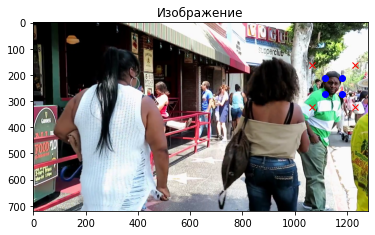

In [16]:
#cap = cv2.VideoCapture(0)
det = Detector(db, False, False)

cap = cv2.VideoCapture("test.mp4")

frames = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        cap.release()
        break

    frames += 1
    if frames % 50 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.title("Изображение")
        plt.imshow(frame)
        frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(frame)
        bias = 50
        det.feed(frame, bias)
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

            plt.plot(face_location[1]+bias, face_location[0]-bias, 'rx')
            plt.plot(face_location[1]+bias, face_location[2]+bias, 'rx')
            plt.plot(face_location[3]-bias, face_location[2]+bias, 'rx')
            plt.plot(face_location[3]-bias, face_location[0]-bias, 'rx')
        plt.show() 
        clear_output(wait=True)

In [17]:
for face in det.registered_collisions:
    print(face.collided_with )

[None, 1, 3]
[0]
[]
[0, 3, None, 6]
[]
[]
[3]
[]
[11]
[]
[10]
[8]
[]
[19]
[]
[]
[]
[]
[]
[13]
[26]
[]
[]
[]
[]
[]
[20]
[]
[]


[<recognition.Face object at 0x7f4b48c7fd50>, <recognition.Face object at 0x7f4b4acc0750>, <recognition.Face object at 0x7f4b48bfa950>, <recognition.Face object at 0x7f4b489f2d50>, <recognition.Face object at 0x7f4b48a636d0>, <recognition.Face object at 0x7f4b48a51090>, <recognition.Face object at 0x7f4b48b43a10>, <recognition.Face object at 0x7f4b48b0c210>, <recognition.Face object at 0x7f4b48896550>, <recognition.Face object at 0x7f4b4ad2e350>, <recognition.Face object at 0x7f4b487f8f50>, <recognition.Face object at 0x7f4b48a94990>, <recognition.Face object at 0x7f4b4ad2eb10>, <recognition.Face object at 0x7f4b48724250>, <recognition.Face object at 0x7f4b4889ffd0>, <recognition.Face object at 0x7f4b48828610>, <recognition.Face object at 0x7f4b5b2d13d0>, <recognition.Face object at 0x7f4b4ad2ae50>, <recognition.Face object at 0x7f4b4ad2a290>, <recognition.Face object at 0x7f4b48826390>, <recognition.Face object at 0x7f4b48bb3810>, <recognition.Face object at 0x7f4b488fda90>, <recognit

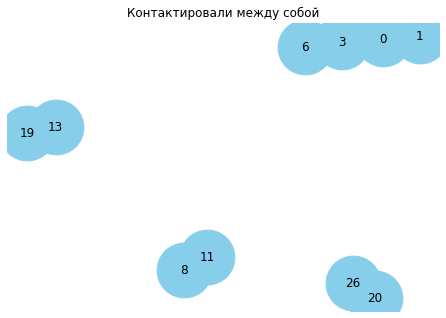

In [24]:
tree = Tree(det.registered_collisions)
print(det.registered_collisions)
tree.build()

# Поиск в ширину
print(tree.breadthFirstSearch(det.registered_collisions[0].collided_with, 6))
# Поиск соседей соседей
print(tree.findConnected(det.registered_collisions[3].collided_with))